In [1]:
import pandas as pd
import numpy as np

In [2]:
dfc = pd.read_csv("bank-full.csv", sep = ";")

In [3]:
dfc.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
import math
import matplotlib
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECA502F3C8>,
      dtype=object)

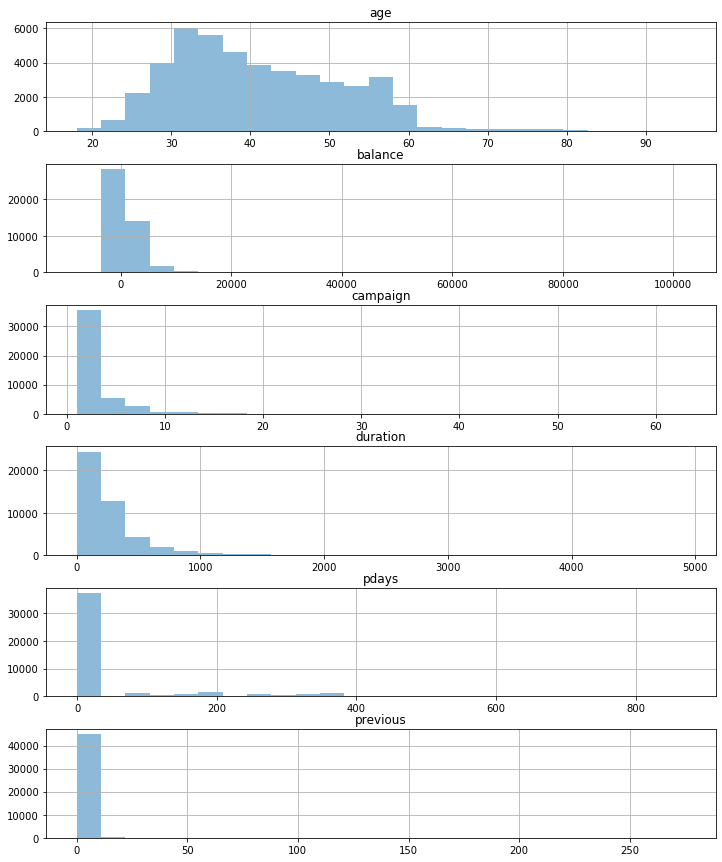

In [5]:
histListCam = ['age','duration', 'pdays', 'campaign', 'previous','balance']
fig, ax = plt.subplots(6, figsize = (12,15))
dfHist = dfc[histListCam]
dfHist.hist(bins = 25, alpha = 0.5, ax = ax)

In [6]:
def removeOutliers(data):
    quantile3 = dfc[data].quantile(0.75)
    quantile1 = dfc[data].quantile(0.25)
    iqr = quantile3 - quantile1
    lowerLimit = quantile1 - 1.5*iqr
    upperLimit = quantile3 + 1.5*iqr
    
    dfc[data] = np.where(dfc[data] > upperLimit, dfc[data].mean(),dfc[data])
    dfc[data] = np.where(dfc[data] < lowerLimit, dfc[data].mean(),dfc[data])

In [7]:
removeOutliers('duration')
removeOutliers('pdays')
removeOutliers('campaign')
removeOutliers('previous')
removeOutliers('balance')
removeOutliers('age')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECA7E1A4C8>,
      dtype=object)

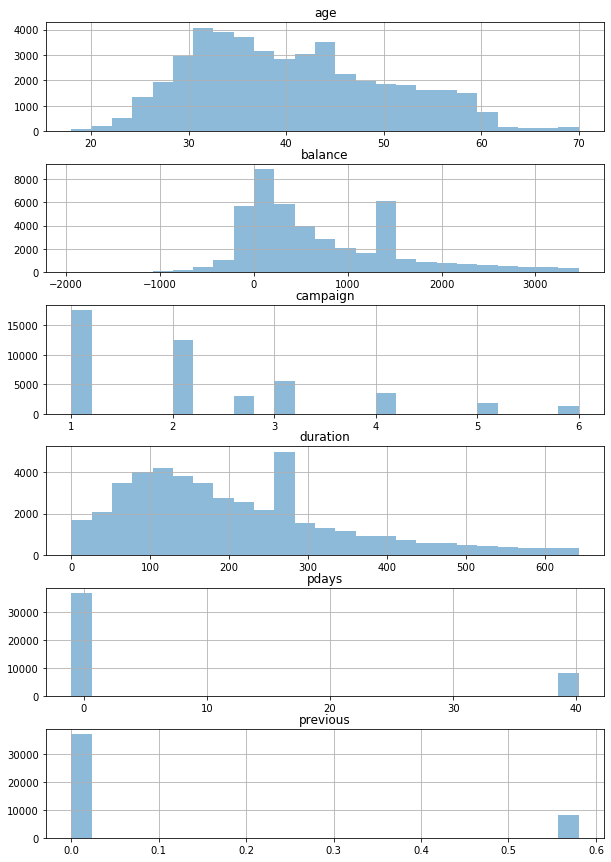

In [8]:
histListCam = ['age','duration', 'pdays', 'campaign', 'previous','balance']
fig, ax = plt.subplots(6, figsize = (10,15))
dfHist = dfc[histListCam]
dfHist.hist(bins = 25, alpha = 0.5, ax = ax)

In [9]:
dfc = dfc.drop(['contact','day', 'month', 'previous', 'pdays'], axis = 1)

In [10]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   duration   45211 non-null  float64
 9   campaign   45211 non-null  float64
 10  poutcome   45211 non-null  object 
 11  y          45211 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.1+ MB


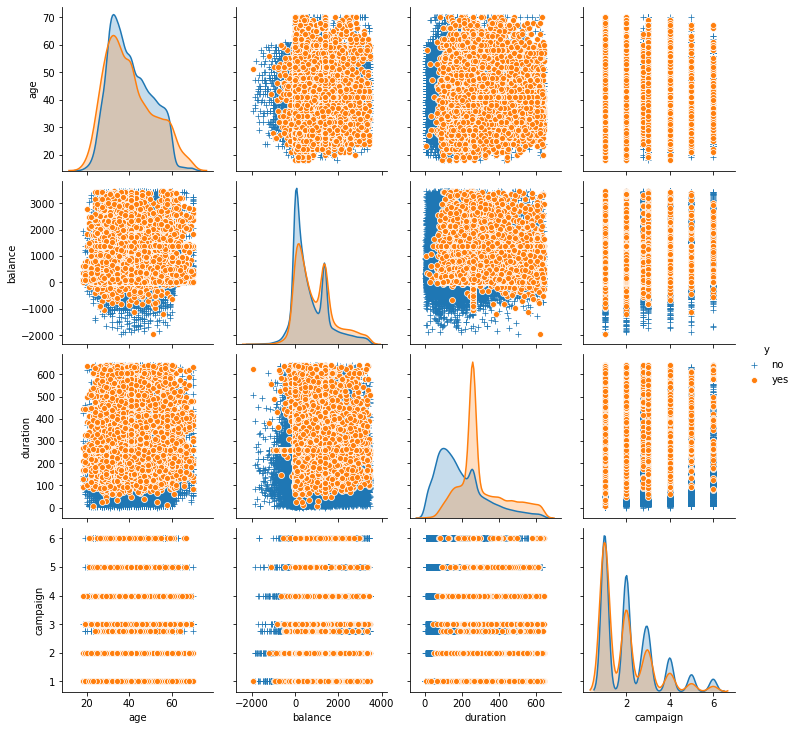

In [11]:
import seaborn as sns
pairplotImage = sns.pairplot(dfc, hue = 'y', markers= ['+', 'o'])

In [12]:
def removeUnknown(data):
    dfc[data] = np.where(dfc[data] != 'unknown', dfc[data])

In [13]:
dfc = dfc.drop(dfc[dfc.job == 'unknown'].index)
dfc = dfc.drop(dfc[dfc.education == 'unknown'].index)

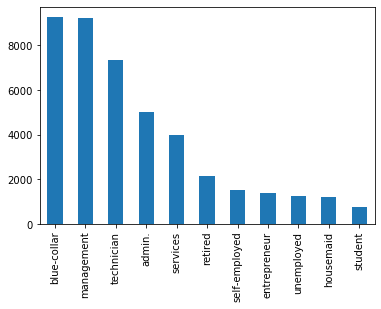

In [14]:
dfc['job'].value_counts().plot(kind = 'bar')

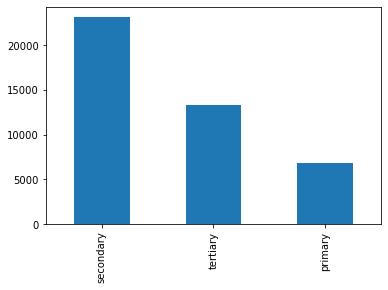

In [15]:
dfc['education'].value_counts().plot(kind = 'bar')

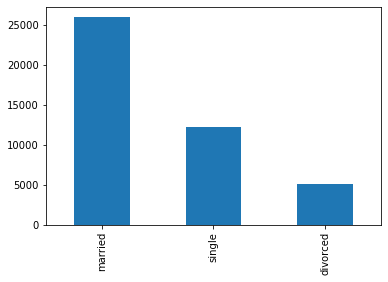

In [16]:
dfc['marital'].value_counts().plot(kind = 'bar')

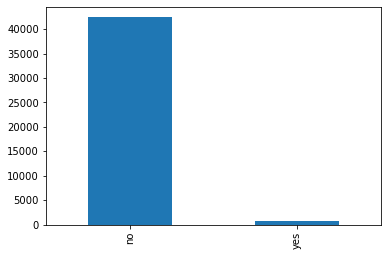

In [17]:
dfc['default'].value_counts().plot(kind = 'bar')
#this attribute will be dropped because it is so heavily weighted towards no

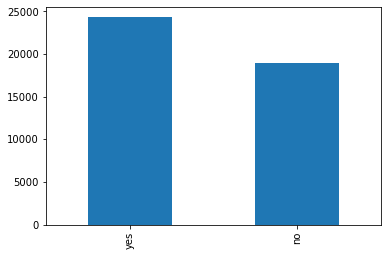

In [18]:
dfc['housing'].value_counts().plot(kind = 'bar')

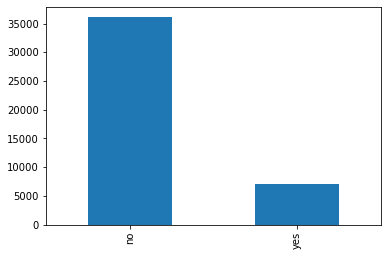

In [19]:
dfc['loan'].value_counts().plot(kind = 'bar')

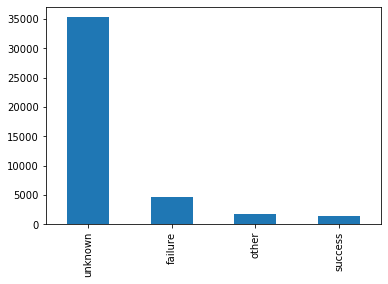

In [20]:
dfc['poutcome'].value_counts().plot(kind = 'bar')

In [21]:
dfc = dfc.drop(['default', 'poutcome'], axis = 1)

In [22]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43193 non-null  float64
 1   job        43193 non-null  object 
 2   marital    43193 non-null  object 
 3   education  43193 non-null  object 
 4   balance    43193 non-null  float64
 5   housing    43193 non-null  object 
 6   loan       43193 non-null  object 
 7   duration   43193 non-null  float64
 8   campaign   43193 non-null  float64
 9   y          43193 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.6+ MB


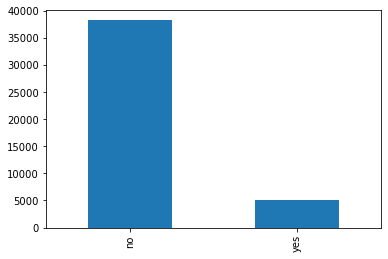

In [23]:
dfc['y'].value_counts().plot(kind = 'bar')
#unbalanced target variable, will need to balance for accurate modeling

In [24]:
dfMajority = dfc[dfc.y == 'no']
dfMinority = dfc[dfc.y == 'yes']

In [25]:
minorSamples = (len(dfMinority))
print(minorSamples)

5021


In [26]:
from sklearn.utils import resample
dfMajorityDownsampled = resample(dfMajority, replace = False, n_samples = minorSamples,random_state = 42)

In [27]:
dfDownSampled = pd.concat([dfMajorityDownsampled, dfMinority])

In [28]:
dfDownSampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 16589 to 45208
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10042 non-null  float64
 1   job        10042 non-null  object 
 2   marital    10042 non-null  object 
 3   education  10042 non-null  object 
 4   balance    10042 non-null  float64
 5   housing    10042 non-null  object 
 6   loan       10042 non-null  object 
 7   duration   10042 non-null  float64
 8   campaign   10042 non-null  float64
 9   y          10042 non-null  object 
dtypes: float64(4), object(6)
memory usage: 863.0+ KB


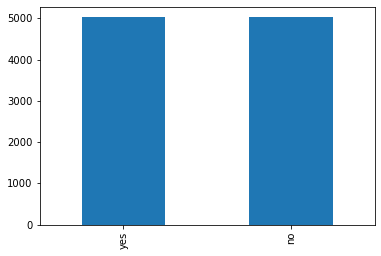

In [29]:
dfDownSampled['y'].value_counts().plot(kind = 'bar')

In [30]:
dfd = pd.get_dummies(dfDownSampled)

In [31]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 16589 to 45208
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10042 non-null  float64
 1   balance              10042 non-null  float64
 2   duration             10042 non-null  float64
 3   campaign             10042 non-null  float64
 4   job_admin.           10042 non-null  uint8  
 5   job_blue-collar      10042 non-null  uint8  
 6   job_entrepreneur     10042 non-null  uint8  
 7   job_housemaid        10042 non-null  uint8  
 8   job_management       10042 non-null  uint8  
 9   job_retired          10042 non-null  uint8  
 10  job_self-employed    10042 non-null  uint8  
 11  job_services         10042 non-null  uint8  
 12  job_student          10042 non-null  uint8  
 13  job_technician       10042 non-null  uint8  
 14  job_unemployed       10042 non-null  uint8  
 15  marital_divorced     10042 non-n

In [32]:
dfd.describe()

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,education_primary,education_secondary,education_tertiary,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
count,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.00000,10042.000000,10042.000000,10042.000000,10042.000000,...,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000
mean,40.237063,804.505625,249.356781,2.083480,0.118403,0.18582,0.029078,0.022904,0.228739,0.071500,...,0.319259,0.139414,0.514439,0.346146,0.513045,0.486955,0.866162,0.133838,0.500000,0.500000
std,10.494765,845.937787,141.924540,1.253899,0.323100,0.38898,0.168033,0.149604,0.420042,0.257671,...,0.466213,0.346396,0.499816,0.475764,0.499855,0.499855,0.340495,0.340495,0.500025,0.500025
min,18.000000,-1944.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,129.000000,142.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,38.000000,565.000000,258.163080,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.500000
75%,48.000000,1362.272058,308.000000,2.763841,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,70.000000,3455.000000,643.000000,6.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
dfd.corr()

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,education_primary,education_secondary,education_tertiary,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
age,1.000000,0.100337,-0.016430,0.005293,-0.047784,-0.024432,0.031384,0.070098,-0.021229,0.369297,...,-0.477630,0.172881,-0.042809,-0.080898,0.126678,-0.126678,0.004478,-0.004478,0.014059,-0.014059
balance,0.100337,1.000000,0.042182,-0.032028,-0.045592,-0.057686,-0.019446,-0.007372,0.057722,0.093690,...,-0.021484,-0.003576,-0.065824,0.071755,0.117565,-0.117565,0.125068,-0.125068,-0.138708,0.138708
duration,-0.016430,0.042182,1.000000,-0.069845,-0.007823,-0.020412,-0.013133,-0.011866,-0.000147,0.045953,...,0.045316,-0.014319,-0.002331,0.012875,0.052994,-0.052994,0.055142,-0.055142,-0.390358,0.390358
campaign,0.005293,-0.032028,-0.069845,1.000000,-0.046030,0.013661,0.017941,0.020967,0.029956,-0.048217,...,-0.052911,0.030199,-0.037301,0.017199,-0.006474,0.006474,-0.017882,0.017882,0.123626,-0.123626
job_admin.,-0.047784,-0.045592,-0.007823,-0.046030,1.000000,-0.175078,-0.063421,-0.056109,-0.199579,-0.101697,...,0.037290,-0.119918,0.233934,-0.158450,-0.053039,0.053039,-0.032469,0.032469,-0.011404,0.011404
job_blue-collar,-0.024432,-0.057686,-0.020412,0.013661,-0.175078,1.000000,-0.082675,-0.073143,-0.260169,-0.132570,...,-0.087724,0.338414,0.074818,-0.324994,-0.204037,0.204037,-0.043055,0.043055,0.132106,-0.132106
job_entrepreneur,0.031384,-0.019446,-0.013133,0.017941,-0.063421,-0.082675,1.000000,-0.026496,-0.094245,-0.048023,...,-0.056221,-0.013190,-0.040574,0.052229,-0.031788,0.031788,-0.027710,0.027710,0.035560,-0.035560
job_housemaid,0.070098,-0.007372,-0.011866,0.020967,-0.056109,-0.073143,-0.026496,1.000000,-0.083379,-0.042486,...,-0.050590,0.149774,-0.052371,-0.054029,0.050607,-0.050607,0.011306,-0.011306,0.013313,-0.013313
job_management,-0.021229,0.057722,-0.000147,0.029956,-0.199579,-0.260169,-0.094245,-0.083379,1.000000,-0.151123,...,0.028816,-0.187707,-0.458086,0.617911,0.081840,-0.081840,0.041380,-0.041380,-0.049551,0.049551
job_retired,0.369297,0.093690,0.045953,-0.048217,-0.101697,-0.132570,-0.048023,-0.042486,-0.151123,1.000000,...,-0.168484,0.187343,-0.042816,-0.091421,0.184521,-0.184521,0.027352,-0.027352,-0.098168,0.098168


In [34]:
dfd.corr().unstack().sort_values().drop_duplicates()

y_no                y_yes                 -1.000000
marital_single      marital_married       -0.778783
education_tertiary  education_secondary   -0.748919
marital_single      age                   -0.477630
job_management      education_secondary   -0.458086
                                             ...   
education_primary   job_blue-collar        0.338414
job_retired         age                    0.369297
y_yes               duration               0.390358
job_management      education_tertiary     0.617911
age                 age                    1.000000
Length: 344, dtype: float64

In [35]:
dfd.corrwith(dfd.y_yes).sort_values()

y_no                  -1.000000
housing_yes           -0.227522
job_blue-collar       -0.132106
campaign              -0.123626
loan_yes              -0.116406
marital_married       -0.091771
education_primary     -0.064399
education_secondary   -0.056586
job_services          -0.045668
job_entrepreneur      -0.035560
age                   -0.014059
job_housemaid         -0.013313
job_technician        -0.012009
marital_divorced       0.007131
job_admin.             0.011404
job_self-employed      0.016082
job_unemployed         0.045633
job_management         0.049551
marital_single         0.092706
job_student            0.093331
job_retired            0.098168
education_tertiary     0.106334
loan_no                0.116406
balance                0.138708
housing_no             0.227522
duration               0.390358
y_yes                  1.000000
dtype: float64

In [36]:
final = dfd.drop(['y_no'], axis = 1)

In [37]:
final.head()

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,housing_no,housing_yes,loan_no,loan_yes,y_yes
16589,32.0,2553.0,459.0,2.763841,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
42706,31.0,460.0,23.0,1.000000,0,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,0
25679,31.0,69.0,640.0,1.000000,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
8388,41.0,-256.0,147.0,2.000000,0,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
6352,33.0,220.0,345.0,1.000000,1,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0


In [38]:
final.describe()

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,housing_no,housing_yes,loan_no,loan_yes,y_yes
count,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.00000,10042.000000,10042.000000,10042.000000,10042.000000,...,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000
mean,40.237063,804.505625,249.356781,2.083480,0.118403,0.18582,0.029078,0.022904,0.228739,0.071500,...,0.563931,0.319259,0.139414,0.514439,0.346146,0.513045,0.486955,0.866162,0.133838,0.500000
std,10.494765,845.937787,141.924540,1.253899,0.323100,0.38898,0.168033,0.149604,0.420042,0.257671,...,0.495921,0.466213,0.346396,0.499816,0.475764,0.499855,0.499855,0.340495,0.340495,0.500025
min,18.000000,-1944.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,129.000000,142.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,565.000000,258.163080,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000
75%,48.000000,1362.272058,308.000000,2.763841,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,70.000000,3455.000000,643.000000,6.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
final.to_csv("Bank-Data-Dummies-Drop-with-Headers-Index.csv")
final.to_csv("Bank-Data-Dummies-Drop.csv", header = False, index_label = False, index= False)